In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews =[]
for i in range(1,pages+1):
    print(f"scraping page{i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    cont = response.content
    pcont = BeautifulSoup(cont,'html.parser')
    for p in pcont.find_all("div",{"class":"text_content"}):
        reviews.append(p.get_text())
    print(f"   ---> {len(reviews)} total reviews")
     


scraping page1
   ---> 100 total reviews
scraping page2
   ---> 200 total reviews
scraping page3
   ---> 300 total reviews
scraping page4
   ---> 400 total reviews
scraping page5
   ---> 500 total reviews
scraping page6
   ---> 600 total reviews
scraping page7
   ---> 700 total reviews
scraping page8
   ---> 800 total reviews
scraping page9
   ---> 900 total reviews
scraping page10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"]=reviews
df.head

<bound method NDFrame.head of                                                reviews
0    ✅ Trip Verified | First the good news, the clu...
1    ✅ Trip Verified |   I have never travelled wit...
2    ✅ Trip Verified | Terrible overall, medium ser...
3    ✅ Trip Verified |   London Heathrow to Male In...
4    Not Verified |  Very good flight following an ...
..                                                 ...
995  ✅ Trip Verified |  Edinburgh to Kuala Lumpur v...
996  ✅ Trip Verified |  I was supposed to fly from ...
997  ✅ Trip Verified |  I purchased a ticket for Du...
998  ✅ Trip Verified |  London to Shanghai. The Con...
999  Not Verified |  I have often flown British Air...

[1000 rows x 1 columns]>

In [10]:
df.to_csv("BA_reviews.csv")

In [11]:
df.reviews=df.reviews.str.split('|',expand=True)[1]

In [12]:
df

,reviews
0,"First the good news, the club suites are such..."
1,I have never travelled with British airways...
2,"Terrible overall, medium service and the flig..."
3,London Heathrow to Male In new business cla...
4,Very good flight following an equally good f...
...,...
995,Edinburgh to Kuala Lumpur via London. I have...
996,I was supposed to fly from London City to Am...
997,I purchased a ticket for Dublin to Mauritius...
998,London to Shanghai. The Concorde room in Hea...


In [56]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+',' ',str(text))
    return text

df['cleaned reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,cleaned reviews,POS tagged,Lemma,Sentiment,Analysis,cleaned_reviews
0,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First,0.0000,Neutral,first the good news the club suites are such ...
1,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai...",never,0.0000,Neutral,i have never travelled with british airways...
2,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se...",Terrible,-0.4767,Negative,terrible overall medium service and the fligh...
3,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ...",London,0.0000,Neutral,london heathrow to male in new business cla...
4,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good,0.4404,Neutral,very good flight following an equally good f...


In [19]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Thrivedhi
[nltk_data]     Sreenivas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thrivedhi
[nltk_data]     Sreenivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Thrivedhi
[nltk_data]     Sreenivas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package omw-1.4 to C:\Users\Thrivedhi
[nltk_data]     Sreenivas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thrivedhi
[nltk_data]     Sreenivas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['cleaned reviews'].apply(token_stop_pos)
df.head()

,reviews,cleaned reviews,Cleaned reviews,POS tagged
0,"First the good news, the club suites are such...",First the good news the club suites are such ...,First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ..."
1,I have never travelled with British airways...,I have never travelled with British airways b...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai..."
2,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se..."
3,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ..."
4,Very good flight following an equally good f...,Very good flight following an equally good fl...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa..."


In [26]:
df = df.drop('Cleaned reviews', axis=1)

In [27]:
df

,reviews,cleaned reviews,POS tagged
0,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ..."
1,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai..."
2,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se..."
3,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ..."
4,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa..."
...,...,...,...
995,Edinburgh to Kuala Lumpur via London. I have...,Edinburgh to Kuala Lumpur via London I have j...,"[(Edinburgh, n), (Kuala, n), (Lumpur, n), (via..."
996,I was supposed to fly from London City to Am...,I was supposed to fly from London City to Ams...,"[(supposed, v), (fly, v), (London, n), (City, ..."
997,I purchased a ticket for Dublin to Mauritius...,I purchased a ticket for Dublin to Mauritius ...,"[(purchased, v), (ticket, n), (Dublin, n), (Ma..."
998,London to Shanghai. The Concorde room in Hea...,London to Shanghai The Concorde room in Heath...,"[(London, n), (Shanghai, v), (Concorde, n), (r..."


In [36]:
# lemmarization 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew=" "
    for word,pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew = lemma_rew + " "+ lemma
        return lemma_rew

df['Lemma'] =  df['POS tagged'].apply(lemmatize)
df.head()

,reviews,cleaned reviews,POS tagged,Lemma
0,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First
1,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai...",never
2,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se...",Terrible
3,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ...",London
4,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good


In [38]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"First the good news, the club suites are such...",First
1,I have never travelled with British airways...,never
2,"Terrible overall, medium service and the flig...",Terrible
3,London Heathrow to Male In new business cla...,London
4,Very good flight following an equally good f...,good
...,...,...
995,Edinburgh to Kuala Lumpur via London. I have...,Edinburgh
996,I was supposed to fly from London City to Am...,suppose
997,I purchased a ticket for Dublin to Mauritius...,purchase
998,London to Shanghai. The Concorde room in Hea...,London


In [39]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 737.0 kB/s eta 0:00:00


In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,reviews,cleaned reviews,POS tagged,Lemma,Sentiment,Analysis
0,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First,0.0000,Neutral
1,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai...",never,0.0000,Neutral
2,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se...",Terrible,-0.4767,Negative
3,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ...",London,0.0000,Neutral
4,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good,0.4404,Neutral


In [52]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Neutral     893
Negative     82
Positive     25
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x298f86055d0>,
 [Text(-1.0384346181647979, 0.36284093456627886, 'Neutral'),
  Text(1.0067653116264432, -0.44319702989270005, 'Negative'),
  Text(1.3458384066138374, -0.10591970205361903, 'Positive')],
 [Text(-0.5664188826353442, 0.19791323703615207, '89.3%'),
  Text(0.5491447154326053, -0.24174383448692727, '8.2%'),
  Text(0.8473797374976012, -0.06669018277450087, '2.5%')])

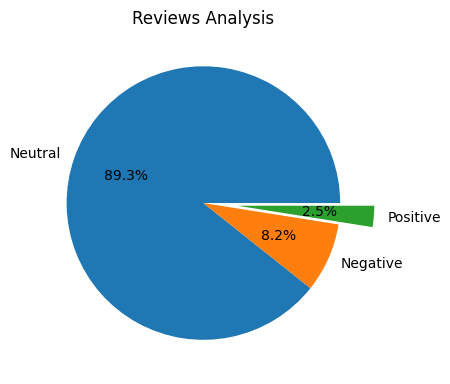

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

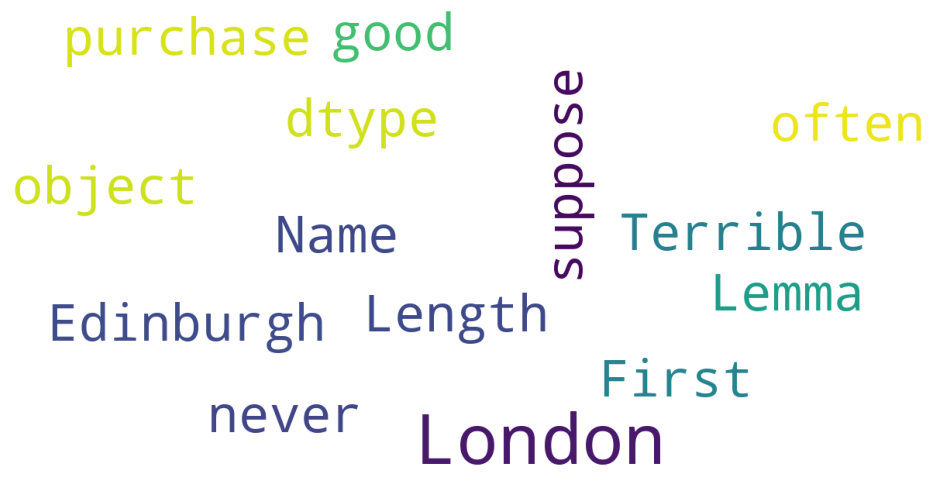

In [54]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
